In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')

In [2]:
data_df = pd.read_csv('data02.csv')
data_df

,Name,Screen,Cpu,MainCamera,SelfieCamera,Rom,Ram,Pin,Price
0,Realme Q2 4G/128G - Hàng nhập khẩu,"IPS LCD 6.5 inch, 120Hz",MediaTek 800U 5G (7 nm),"Chính 48MP & Phụ 8MP, 2MP",16 MP,128 GB,4GB,"5000mAh, sạc nhanh 30w",1
1,Xiaomi POCO M3 - Chính hãng,"IPS LCD, 6.53"", Full HD+",Snapdragon 662 8 nhân,"Chính 48 MP & Phụ 2 MP, 2 MP",8MP,128/64 GB,4GB,6000mAh,1
2,Oppo Reno5 8GB/128GB chính hãng,"6,43 inch, OLED",Qualcomm SM7125 Snapdragon 720G (8 nm),"Chính 64 MP & Phụ 8 MP, 2 MP, 2 MP",44MP,128 GB,8 GB,4.310 mAh + Sạc nhanh 50W,2
3,Redmi Note 9 Pro 5G 6Gb/128Gb,,Octa-core (2x2.2 GHz Kryo 570 & 6x1.8 GHz Kryo...,Chính 108MP+8MP+2MP+2MP,16MP,128 GB,6GB,Li-Po 4820 mAh,2
4,iPhone SE Cũ 16Gb Nguyên Bản,"IPS LCD, 4.0"", DVGA",Apple A9,12 MP,1.2 MP,16 GB,2 GB,Li-Po 1624 mAh,1
...,...,...,...,...,...,...,...,...,...
1416,Masstel HAPI 10 Fami,"IPS LCD, 5"", HD",MediaTek MT6739 4 nhân,5 MP,5 MP,16 GB,2 GB,2000 mAh,1
1417,Itel Alpha Lite,"TFT LCD, 5"", FWVGA",Spreadtrum SC7731E 4 nhân,5 MP,2 MP,8 GB,1 GB,2050 mAh,1
1418,Mobell P41,"IPS LCD, 5.5"", FWVGA+",MediaTek MT6580A 4 nhân,5 MP,2 MP,8 GB,1 GB,3500 mAh,1
1419,Masstel X5 Fami,"IPS LCD, 5.45"", HD+",Spreadtrum SC7731E 4 nhân,8 MP,5 MP,8 GB,1 GB,3200 mAh,1


In [3]:
data_df.isna().sum()

Name             0
Screen           0
Cpu             52
MainCamera      26
SelfieCamera     7
Rom              7
Ram              7
Pin             45
Price            0
dtype: int64

In [4]:
data_df.shape

(1421, 9)

### Tách các tập.

In [5]:
# Tách X và y
y = data_df["Price"]
X = data_df.drop("Price", axis=1)

In [6]:
y

0       1
1       1
2       2
3       2
4       1
       ..
1416    1
1417    1
1418    1
1419    1
1420    1
Name: Price, Length: 1421, dtype: int64

In [7]:
X

,Name,Screen,Cpu,MainCamera,SelfieCamera,Rom,Ram,Pin
0,Realme Q2 4G/128G - Hàng nhập khẩu,"IPS LCD 6.5 inch, 120Hz",MediaTek 800U 5G (7 nm),"Chính 48MP & Phụ 8MP, 2MP",16 MP,128 GB,4GB,"5000mAh, sạc nhanh 30w"
1,Xiaomi POCO M3 - Chính hãng,"IPS LCD, 6.53"", Full HD+",Snapdragon 662 8 nhân,"Chính 48 MP & Phụ 2 MP, 2 MP",8MP,128/64 GB,4GB,6000mAh
2,Oppo Reno5 8GB/128GB chính hãng,"6,43 inch, OLED",Qualcomm SM7125 Snapdragon 720G (8 nm),"Chính 64 MP & Phụ 8 MP, 2 MP, 2 MP",44MP,128 GB,8 GB,4.310 mAh + Sạc nhanh 50W
3,Redmi Note 9 Pro 5G 6Gb/128Gb,,Octa-core (2x2.2 GHz Kryo 570 & 6x1.8 GHz Kryo...,Chính 108MP+8MP+2MP+2MP,16MP,128 GB,6GB,Li-Po 4820 mAh
4,iPhone SE Cũ 16Gb Nguyên Bản,"IPS LCD, 4.0"", DVGA",Apple A9,12 MP,1.2 MP,16 GB,2 GB,Li-Po 1624 mAh
...,...,...,...,...,...,...,...,...
1416,Masstel HAPI 10 Fami,"IPS LCD, 5"", HD",MediaTek MT6739 4 nhân,5 MP,5 MP,16 GB,2 GB,2000 mAh
1417,Itel Alpha Lite,"TFT LCD, 5"", FWVGA",Spreadtrum SC7731E 4 nhân,5 MP,2 MP,8 GB,1 GB,2050 mAh
1418,Mobell P41,"IPS LCD, 5.5"", FWVGA+",MediaTek MT6580A 4 nhân,5 MP,2 MP,8 GB,1 GB,3500 mAh
1419,Masstel X5 Fami,"IPS LCD, 5.45"", HD+",Spreadtrum SC7731E 4 nhân,8 MP,5 MP,8 GB,1 GB,3200 mAh


- Tách tập Train, Validation và Test với tỉ lệ 60:20:20

In [8]:
# tách tập train(train và val) và tập test với tỉ lệ 80:20
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# từ tập train tách ra tập train và tập validation với tỉ lệ 75:25 để ứng với 60:20 ở tập dữ liệu ban đâu.
tr_X, val_X, tr_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=0)

In [10]:
# tập train( dùng để huấn luyện)
tr_X.shape

(852, 8)

In [11]:
val_X.shape

(284, 8)

In [12]:
test_X.shape

(285, 8)

In [13]:
tr_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 1414 to 745
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          852 non-null    object
 1   Screen        852 non-null    object
 2   Cpu           822 non-null    object
 3   MainCamera    846 non-null    object
 4   SelfieCamera  847 non-null    object
 5   Rom           846 non-null    object
 6   Ram           846 non-null    object
 7   Pin           830 non-null    object
dtypes: object(8)
memory usage: 59.9+ KB


In [14]:
tr_y

1414    1
1379    1
112     2
636     2
1312    4
       ..
201     1
990     1
595     1
229     1
745     1
Name: Price, Length: 852, dtype: int64

### Quan sát dữ liệu từ tập tr_X( tập huấn luyện) nhân thấy:
 - Ở thuôc tính Name có thể tách ra hãng sản xuất, do thực tế có thể thấy rằng, mỗi hãng khác nhau sẽ có giá bán khác nhau.
 - Các thuộc tính Screen, Main Camera, Selfie Camera, Ram, Rom và Pin có thể tách lấy các giá trị dạng số bằng với :
     + Screen: lấy kích thước màn hình( đơn vị inchs).
     + Main Camera, Selfie Camera: lấy giá trị độ phân giải của camera chính.( đối với giá trị có nhiều giá trị, ví dụ:Chính 48 MP & Phụ 8 MP, 2 MP, 2 MP, thì chỉ lấy giá trị camera chính.
     + Đối với Ram và Rom xử lí chuỗi bình thường.
 - Thuộc tính CPU có thể tách ra loại chip: ví dụ: Qualcomm Snapdragon, MediaTek, Exynos, ... Nhưng trên thị trường có quá nhiều phiên bản khác nhau của chip nên sẽ bỏ qua cột dữ liệu này :((

- Class ColAdderDropper sẽ xử lý thuộc tính Name của dữ liệu, thay thế thuộc tính Name bằng thuốc tính Phone Maker, chỉ ra rằng giá trị của thuộc tính này là hãng điện thoại.

In [15]:
# xóa cột Name và thêm cột Phone Maker, xóa cột Cpu
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_pmakers=1):
        self.num_top_pmakers = num_top_pmakers
    def fit(self, tr_X, y=None):
        pmakers_col = pd.Series([name.split()[0].upper() for name in tr_X.Name])
        self.pmaker_counts_ = pmakers_col.value_counts()
        pmakers = list(self.pmaker_counts_.index)
        self.top_pmakers_ = pmakers[:max(1, min(self.num_top_pmakers, len(pmakers)))]
        return self
    def transform(self, X_df, y=None):
        name = X_df.Name
        df = X_df.drop(["Cpu","Name"], axis = 1)
        Pmakers = []
        for val in name:
            pmaker = 'OTHERS'
            for p in self.top_pmakers_:
                if p in val.upper():
                    pmaker = p
                    break
            Pmakers.append(pmaker)
        df['PhoneMaker'] = pd.Series(Pmakers, index = df.index)
        return df

In [16]:
col_adderdropper = ColAdderDropper(num_top_pmakers=10)
col_adderdropper.fit(tr_X)
print(col_adderdropper.pmaker_counts_)
print()
print(col_adderdropper.top_pmakers_)

XIAOMI        143
SAMSUNG       124
IPHONE        116
OPPO           78
REALME         42
VIVO           42
VSMART         34
BLACKBERRY     28
ASUS           28
SONY           27
HTC            23
LENOVO         16
NOKIA          15
SKY            13
PHILIPS        13
MOTOROLA       12
LG             12
GIONEE         11
SHARP          10
HUAWEI          9
MASSGO          7
KYOCERA         7
WIKO            6
NOMI            4
GOOGLE          4
TECNO           3
ĐIỆN            3
PANTECH         2
INFINIX         2
NUBIA           2
MASSTEL         2
ITEL            2
ONEPLUS         2
INFOCUS         2
MEIZU           2
BPHONE          1
KASHI           1
ANOKA           1
MÁY             1
OBI             1
REDMI           1
dtype: int64

['XIAOMI', 'SAMSUNG', 'IPHONE', 'OPPO', 'REALME', 'VIVO', 'VSMART', 'BLACKBERRY', 'ASUS', 'SONY']


In [17]:
col_adderdropper.transform(tr_X)

,Screen,MainCamera,SelfieCamera,Rom,Ram,Pin,PhoneMaker
1414,"IPS LCD, 5.7"", HD+",5 MP,5 MP,16 GB,1 GB,2800 mAh,OTHERS
1379,"IPS LCD, 6.5"", HD+","Chính 12 MP & Phụ 2 MP, 2 MP",8 MP,128 GB,4 GB,4230 mAh,OPPO
112,6.4 inches,"Triple: 12 MP, f/1.5-2.4, 26mm (wide), 1/2.55""...",8.0 MP,128 GB,8 GB,Li-Ion 4100 mAh,SAMSUNG
636,,64MP f1.8 (main) 13MP f2.4(wide) 8MP f/2.4 (te...,Dual 20 MP + 2 MP,64 GB,6 GB,4500mAh,XIAOMI
1312,"OLED, 6.1"", Super Retina XDR",3 camera 12 MP,12 MP,256 GB,6 GB,"2815 mAh, có sạc nhanh",IPHONE
...,...,...,...,...,...,...,...
201,"TFT LCD, 6.5"", HD+","Chính 13 MP & Phụ 2 MP, 2 MP",5MP,32 GB,3GB,Li-Po 5000 mAh,SAMSUNG
990,"Super LCD 3, 5.2"", QuadHD (2K)",20 MP,4.0 MP,32 GB,3 GB,Li-Po 2840 mAh,OTHERS
595,"5.5 inches, S-CG Silicon LCDFull HD 1080 x 19...",13.1 MP,1.2 CMOS,16 GB,2 GB,Li-Ion 2610 mAh,OTHERS
229,"IPS LCD, 4.7"", HD",8.0 MP,1.2 MP,16 GB,1 GB,Li-Po 1810 mAh,IPHONE


In [18]:
# chuyển giá trị màn hình từ chuỗi sang số theo kích thước màn hình lọc được từ thông số màn hình.
# Camera trước và Selfie camera lấy theo giá trị camera chính.
### vì dữ liệu thu thập từ nhiều trang web khác nhau nên định dạng khác nhau ví dụ: 12 MP và 12MP ... Nên sẽ có 
##  một vài sai số. Nhưng tạm chấp nhận được :(((
class EncodingString(BaseEstimator, TransformerMixin):
    def __init__(self, cols = None):
        self. cols = cols
    def fit(self,X_df,y =None):
        encode = []
        for col in self.cols:
            encode.append((col,X_df[col].str.extract(r'([0-9][0-9][0-9][0-9]|[0-9][0-9][0-9]|[0-9][0-9]|[0-9][.,][0-9]|[0-9])', expand=False).str.replace(',','.')))
        self.encode = dict(encode)
        return self
    def transform(self, X_df, y=None):
        df = X_df.drop(self.cols, axis = 1)
        for col in self.cols:
            if col == 'Pin':
                df[col] = pd.Series(pd.to_numeric(self.encode[col]), index = df.index)/1000
            else:
                df[col] = pd.Series(pd.to_numeric(self.encode[col]), index = df.index)

        return df

In [19]:
cols = ["Screen","MainCamera","SelfieCamera","Rom","Ram","Pin"]
col_encoding = EncodingString(cols = cols)
col_encoding.fit(tr_X)
a =col_encoding.transform(tr_X)

In [20]:
df = col_encoding.fit_transform(ColAdderDropper(num_top_pmakers=7).fit_transform(tr_X))

In [21]:
df

,PhoneMaker,Screen,MainCamera,SelfieCamera,Rom,Ram,Pin
1414,OTHERS,5.7,5.0,5.0,16.0,1.0,2.800
1379,OPPO,6.5,12.0,8.0,128.0,4.0,4.230
112,SAMSUNG,6.4,12.0,8.0,128.0,8.0,4.100
636,XIAOMI,NaN,64.0,20.0,64.0,6.0,4.500
1312,IPHONE,6.1,3.0,12.0,256.0,6.0,2.815
...,...,...,...,...,...,...,...
201,SAMSUNG,6.5,13.0,5.0,32.0,3.0,5.000
990,OTHERS,3.0,20.0,4.0,32.0,3.0,2.840
595,OTHERS,5.5,13.0,1.2,16.0,2.0,2.610
229,IPHONE,4.7,8.0,1.2,16.0,1.0,1.810


In [22]:
num_cols = ["Screen","MainCamera","SelfieCamera","Rom","Ram","Pin"]
unorder_cate_cols=["PhoneMaker"]

preprocess=ColumnTransformer(
    transformers=[
        ('nume_cols',SimpleImputer(strategy='mean'),num_cols),
        ('unorder_cate_col',make_pipeline(
            (SimpleImputer(strategy='most_frequent')),
             (OneHotEncoder(handle_unknown='ignore',sparse=False))
        )
         ,unorder_cate_cols)]
)

preprocess_pipeline=Pipeline(steps=[
    ('coladderdropper',ColAdderDropper(num_top_pmakers=7)),
    ('encodingstring',EncodingString(cols = num_cols)),
    ('preprocess',preprocess),
    ('standardscaler',StandardScaler())

]
)

In [23]:
preprocess_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_pmakers=7)),
                ('encodingstring',
                 EncodingString(cols=['Screen', 'MainCamera', 'SelfieCamera',
                                      'Rom', 'Ram', 'Pin'])),
                ('preprocess',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['Screen', 'MainCamera',
                                                   'SelfieCamera', 'Rom', 'Ram',
                                                   'Pin']),
                                                 ('unorder_cate_col',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['PhoneMaker'])])),
                ('standardscaler', StandardScaler())])

In [24]:
preprocess_pipeline.fit_transform(tr_X)

array([[-1.93197218e-01, -8.14324446e-01, -1.95305140e-01, ...,
        -2.27710017e-01, -2.03874452e-01, -4.49101909e-01],
       [-1.89257975e-01, -4.49156251e-01, -1.15444018e-01, ...,
        -2.27710017e-01, -2.03874452e-01, -4.49101909e-01],
       [-1.89750380e-01, -4.49156251e-01, -1.15444018e-01, ...,
        -2.27710017e-01, -2.03874452e-01, -4.49101909e-01],
       ...,
       [-1.94182029e-01, -3.96989367e-01, -2.96462561e-01, ...,
        -2.27710017e-01, -2.03874452e-01, -4.49101909e-01],
       [-1.98121272e-01, -6.57823791e-01, -2.96462561e-01, ...,
        -2.27710017e-01, -2.03874452e-01, -4.49101909e-01],
       [-1.97628867e-01, -8.14324446e-01, -1.41861850e-16, ...,
        -2.27710017e-01, -2.03874452e-01, -4.49101909e-01]])

In [25]:
full_pipeline_mlpclassifier = make_pipeline(
    (preprocess_pipeline),
    (MLPClassifier(hidden_layer_sizes=(64,64),activation= 'tanh', solver='lbfgs', random_state=0, max_iter=15000))

)

In [26]:
full_pipeline_logisticregression = make_pipeline(
    (preprocess_pipeline),
    (LogisticRegression(multi_class='multinomial')))

In [27]:
train_errs = []
val_errs = []

alphas = [1, 2, 5, 10, 100, 500, 1000]
num_top_pmakers_s = [1, 3, 5, 6, 8,10,12]

best_val_err = float('inf')
best_alpha = None
best_num_top_pmakers = None

for alpha in alphas:
    for num_top_pmakers in num_top_pmakers_s:
        # YOUR CODE HERE
        full_pipeline_mlpclassifier.set_params(pipeline__coladderdropper__num_top_pmakers=num_top_pmakers,mlpclassifier__alpha = alpha)
        print(alpha,num_top_pmakers)
        s = full_pipeline_mlpclassifier.fit(tr_X,tr_y)

        train_err = (1-s.score(tr_X,tr_y))*100
        val_err = (1-s.score(val_X,val_y))*100

        train_errs.append(train_err)
        val_errs.append(val_err)
        if val_err <= min(val_errs):
            best_alpha = alpha
            best_num_top_pmakers = num_top_pmakers
best_val_err = min(val_errs)

'Finish!'

1 1
1 3
1 5
1 6
1 8
1 10
1 12
2 1
2 3
2 5
2 6
2 8
2 10
2 12
5 1
5 3
5 5
5 6
5 8
5 10
5 12
10 1
10 3
10 5
10 6
10 8
10 10
10 12
100 1
100 3
100 5
100 6
100 8
100 10
100 12
500 1
500 3
500 5
500 6
500 8
500 10
500 12
1000 1
1000 3
1000 5
1000 6
1000 8
1000 10
1000 12


'Finish!'

In [28]:
best_num_top_pmakers

3

In [29]:
best_alpha

10

In [30]:
best_val_err

32.3943661971831

In [31]:
val_errs

[85.2112676056338,
 78.87323943661973,
 76.05633802816901,
 76.05633802816901,
 75.70422535211267,
 71.83098591549295,
 76.40845070422534,
 85.2112676056338,
 78.87323943661973,
 50.70422535211267,
 76.05633802816901,
 73.23943661971832,
 71.83098591549295,
 72.88732394366197,
 71.83098591549295,
 35.91549295774647,
 58.80281690140845,
 58.098591549295776,
 52.816901408450704,
 54.92957746478873,
 52.816901408450704,
 34.50704225352113,
 32.3943661971831,
 34.859154929577464,
 34.859154929577464,
 54.22535211267605,
 52.816901408450704,
 36.61971830985915,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113,
 34.50704225352113]

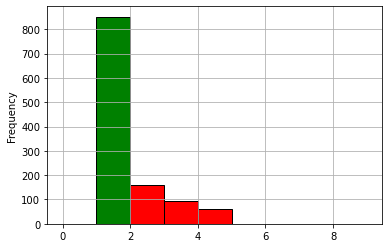

In [32]:
# Visualized hai đồ thị của train_y ban đầu và train_y dự đoán.
tr_y.plot.hist(bins=range(0, 10, 1), edgecolor='black', color ='red')
tr_y_pre = pd.Series(s.predict(tr_X))
tr_y_pre.hist(bins=range(0, 10, 1), edgecolor='black', color = 'green')

In [34]:
full_pipeline_mlpclassifier.set_params(pipeline__coladderdropper__num_top_pmakers=best_num_top_pmakers,mlpclassifier__alpha = best_alpha,mlpclassifier__verbose=True)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('coladderdropper',
                                  ColAdderDropper(num_top_pmakers=3)),
                                 ('encodingstring',
                                  EncodingString(cols=['Screen', 'MainCamera',
                                                       'SelfieCamera', 'Rom',
                                                       'Ram', 'Pin'])),
                                 ('preprocess',
                                  ColumnTransformer(transformers=[('nume_cols',
                                                                   SimpleImputer(),
                                                                   ['Screen',
                                                                    'MainCamera',
                                                                    'SelfieCamera',
                                                                    'Rom',
                                                                    'Ram',
                                                                    'Pin']),
                                                                  ('unorder_cate_col',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['PhoneMaker'])])),
                                 ('standardscaler', StandardScaler())])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=10,
                               hidden_layer_sizes=(64, 64), max_iter=15000,
                               random_state=0, solver='lbfgs', verbose=True))])

In [36]:
m_mlpclassifier=full_pipeline_mlpclassifier.fit(train_X,train_y)

In [37]:
m_logisticregression=full_pipeline_logisticregression.fit(train_X,train_y)

In [38]:
m_mlpclassifier.predict(test_X)

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [39]:
m_logisticregression.predict(test_X)

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [40]:
m_mlpclassifier.score(test_X,test_y)

0.6456140350877193

In [41]:
m_logisticregression.score(test_X,test_y)

0.6456140350877193